<div class="usecase-title">Optimising Public Budget Allocation for Sustainable Urban Development: A Case Study of Melbourne (2014–15)</div>

<div class="usecase-authors"><b>Authored by:</b> Jnaneshwari Beerappa</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
  <div class="usecase-level"><b>Level:</b> Intermediate</div>
  <div class="usecase-skill"><b>Pre-requisite Skills:</b> Python, Pandas, API Access, Data Cleaning, Financial Data Interpretation, Data Visualisation</div>
</div>

<div class="usecase-section-header">Scenarios</div>

<b>Scenario 1: Identifying Over- and Under-Spending in Key City Services</b>
Understanding where actual spending deviated significantly from planned budgets can help city planners refine future financial strategies. For example, over-spending in administrative costs versus under-spending in sustainability projects could highlight misaligned priorities.

<b>Scenario 2: Tracing Sources of Urban Revenue</b>
Melbourne receives funding from a variety of sources, such as rates, grants, and fees. Analysing these income streams helps us understand the financial backbone of the city and evaluate which sources are sustainable or volatile.

<b>Scenario 3: Evaluating the Efficiency of Cash Flow Management</b>
By exploring the city’s cash inflow and outflow patterns, this project investigates how well Melbourne manages its liquidity and whether cash reserves are strategically deployed to meet civic goals.

<b>Scenario 4: Informing Future Budget Allocations</b>
This project provides a foundation for building data-driven, transparent budget models. These insights can help recommend smarter, more community-focused allocations in future fiscal years (e.g., prioritising health, sustainability, or digital infrastructure).

<div class="usecase-section-header">Use Case Summary</div>

As a data analyst supporting public policy, I want to analyse Melbourne's financial performance in 2014–15 using actual vs. planned income and expenditures so that I can recommend optimised budget allocations for future urban development initiatives.

<div class="usecase-section-header">At the End of This Use Case, You Will:</div>

* Learn how to load government financial datasets via API using Python.
* Conduct basic financial comparisons such as Actual vs. Planned values across categories.
* Analyse patterns in income sources and spending priorities.
* Visualise budget data using charts and summary tables.
* Draw insights that support public policy recommendations on budget efficiency and sustainability.

<div class="usecase-section-header">Context and Importance</div>

Public financial transparency is essential for building trust and making better investment decisions in urban areas. Melbourne’s 2014–15 financial datasets provide a rich foundation to examine how funds were sourced, allocated, and spent across the city. By identifying trends, gaps, and anomalies, this use case helps align future budgets with pressing urban needs—such as climate resilience, community services, and economic growth.

<b>Key datasets used include:</b>

* Standard Income Statement: Details actual income by category (e.g., rates, grants, fees).
* Sources of Funding – Operating: Lists where funding came from, planned and actual.
* Standard Cash Flow Statement: Shows how funds flowed in and out of city accounts.

<div class="usecase-section-header">Learning Objectives</div>

* Understand how public financial records can be analysed for accountability and planning.
* Develop skills in loading, cleaning, and transforming open financial datasets.
* Use exploratory data analysis (EDA) techniques to uncover hidden patterns in income and spending.
* Create compelling visualisations (bar charts, pie charts, heatmaps) to support insights.
* Apply problem-solving to reconcile inconsistencies between planned vs. actual records.
* Collaborate using GitHub for code sharing and version control.


In [ ]:
import pandas as pd
import requests
from io import StringIO

# Base URL for the City of Melbourne Open Data API
# This is the root part of the link we'll use to request data from the portal.
base_url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"

#  These are the three dataset identifiers
# Each one points to a specific financial report for the 2014–15 year.
dataset_ids = {
    "Income Statement": "standard-income-statement-2014-15",
    "Funding Operating": "sources-of-funding-operating-2014-15",
    "Cash Flow Statement": "standard-statement-of-cash-flows-2014-15"
}

# This function fetches the dataset from the API using the given ID.
# It handles both comma-separated and semicolon-separated files.
def load_tabular_dataset(dataset_id):
    # Construct the full URL to download the dataset in CSV format
    url = f"{base_url}{dataset_id}/exports/csv"

    # Make the HTTP GET request to fetch the data
    response = requests.get(url)

    # Raise an error if the request failed (e.g., wrong ID, no internet)
    response.raise_for_status()

    # Try reading the CSV using the default comma delimiter
    try:
        df = pd.read_csv(StringIO(response.text))
    except pd.errors.ParserError:
        # If it fails (which happens if the file uses semicolons), try again with sep=';'
        df = pd.read_csv(StringIO(response.text), sep=';')

    # Return the final DataFrame to the caller
    return df

# We'll use a dictionary to store all the datasets once loaded
# This makes it easier to refer to each one by name later
datasets = {}

# Loop through each dataset we want to load
for name, identifier in dataset_ids.items():
    try:
        # Load the dataset using our custom function
        df = load_tabular_dataset(identifier)

        # Store it in the dictionary with a friendly name
        datasets[name] = df

        # Let us know it worked and show the dimensions of the data
        print(f"{name} loaded successfully with shape: {df.shape}")

    except Exception as e:
        # If something goes wrong, we print an error message so we can debug it
        print(f"⚠️ Error loading {name}: {e}")

# Now, let's take a quick look at the first few rows of each dataset
# This helps confirm that the structure looks okay and data was loaded properly
for name, df in datasets.items():
    print(f"\n🔹 {name} - Top 5 rows:")
    print(df.head())


Income Statement loaded successfully with shape: (128, 1)
Funding Operating loaded successfully with shape: (20, 1)
Cash Flow Statement loaded successfully with shape: (74, 7)

🔹 Income Statement - Top 5 rows:
  as_at_date;year;actual_budget_plan;category;sub_category;description;value_000
0  2014-07-01;2012-13;ACTUAL;REVENUE;;Rates;203576.0                            
1  2014-07-01;2012-13;ACTUAL;REVENUE;Grants and S...                            
2  2014-07-01;2012-13;ACTUAL;REVENUE;;Parking Fee...                            
3  2014-07-01;2012-13;ACTUAL;REVENUE;;Parking Fin...                            
4  2014-07-01;2012-13;ACTUAL;REVENUE;;Sales & Rec...                            

🔹 Funding Operating - Top 5 rows:
  year;actual_budget_plan;category;sub_category;description;value_000
0  2014 - 15;BUDGET;OPERATING RECURRENT;Federal;C...                 
1  2014 - 15;BUDGET;OPERATING RECURRENT;State;Sch...                 
2  2014 - 15;BUDGET;OPERATING RECURRENT;State;Pub...       

Step 1: Data Preparation and Cleaning
Load all three datasets via API

Split columns with semicolons into multiple usable columns

Clean column names

Check and handle missing value

In [ ]:
import pandas as pd
import requests
from io import StringIO

# Dataset IDs
dataset_ids = {
    "Income Statement": "standard-income-statement-2014-15",
    "Funding Operating": "sources-of-funding-operating-2014-15",
    "Cash Flow Statement": "standard-statement-of-cash-flows-2014-15"
}

# Function to load CSV from API
def load_tabular_dataset(dataset_id):
    url = f"https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/{dataset_id}/exports/csv"
    response = requests.get(url)
    response.raise_for_status()

    try:
        return pd.read_csv(StringIO(response.text))
    except pd.errors.ParserError:
        return pd.read_csv(StringIO(response.text), sep=';')

# Load datasets
datasets = {}
for name, identifier in dataset_ids.items():
    try:
        df = load_tabular_dataset(identifier)
        datasets[name] = df
        print(f"{name} loaded: {df.shape}")
    except Exception as e:
        print(f"Error loading {name}: {e}")


Income Statement loaded: (128, 1)
Funding Operating loaded: (20, 1)
Cash Flow Statement loaded: (74, 7)


In [ ]:
# For datasets with merged columns (like Income Statement)
income_df = datasets["Income Statement"]
income_df = income_df.iloc[:, 0].str.split(";", expand=True)  # Split by semicolon
income_df.columns = ["as_at_date", "year", "actual_budget_plan", "category", "sub_category", "description", "value_000"]

# Converting numeric columns
income_df["value_000"] = pd.to_numeric(income_df["value_000"], errors="coerce")

# Checking missing values
print(income_df.isnull().sum())


as_at_date            0
year                  0
actual_budget_plan    0
category              0
sub_category          0
description           0
value_000             0
dtype: int64


Step 2: Exploratory Data Analysis (EDA)

Summarize income vs. expense totals

Identify top revenue contributors

Analyze overspending/underspending trends

In [ ]:
# Drop missing values in value
income_df = income_df.dropna(subset=["value_000"])

# Group by description (revenue categories)
grouped_income = income_df[income_df["actual_budget_plan"] == "ACTUAL"].groupby("description")["value_000"].sum().sort_values(ascending=False)

print("Top 10 revenue sources:")
print(grouped_income.head(10))

# Compare actual vs planned by description
pivot_summary = income_df.groupby(["description", "actual_budget_plan"])["value_000"].sum().unstack()
pivot_summary["diff"] = pivot_summary["ACTUAL"] - pivot_summary["BUDGET"]
pivot_summary = pivot_summary.sort_values("diff", ascending=False)

print("Overspending/Underspending Summary:")
print(pivot_summary.head())


Top 10 revenue sources:
description
Rates                          203576.0
Materials & Services           147559.0
Employee Costs                 117939.0
Depreciation - Other Assets     52822.0
Parking Fines                   41858.0
Parking Fees                    40021.0
Sundry Fees & Charges           21483.0
Intercompany Revenue            19973.0
Grants & Contributions          13465.0
Finance & Insurance Costs       10952.0
Name: value_000, dtype: float64
Overspending/Underspending Summary:
actual_budget_plan                       ACTUAL    BUDGET     PLAN      diff
description                                                                 
Capital Contributions                       0.0 -18237.45 -58943.0  18237.45
Gain on Investment Revaluation           1468.0      0.00      0.0   1468.00
Government Taxes & Levies                4065.0   2880.00   4918.0   1185.00
Operating                               10561.0  10682.00      NaN   -121.00
Net Gain or Loss on disposal of As

Step 3: Visualizations

Plot revenue breakdown

Plot planned vs actual comparison


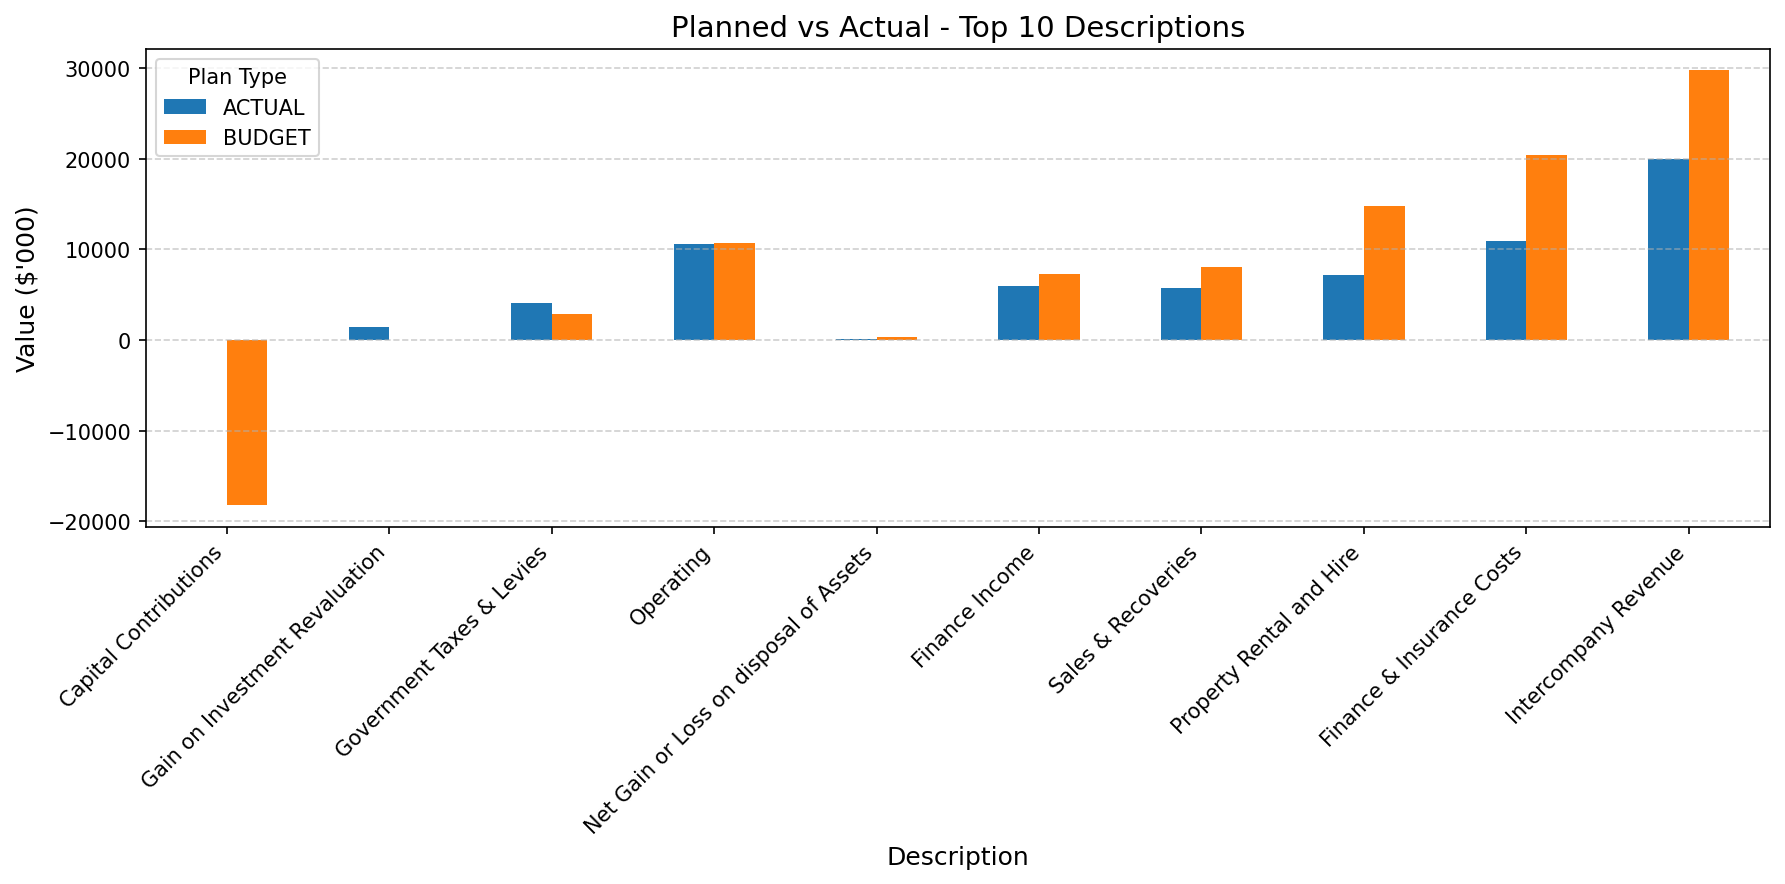

In [ ]:
# Step 4: Now let's plot the top 10 categories — Planned vs Actual

# Create a high-resolution figure
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

# Plot a grouped bar chart
comparison_filtered.plot.bar(ax=ax, color=["#1f77b4", "#ff7f0e"])

# Adding titles and labels
ax.set_title("Planned vs Actual - Top 10 Descriptions", fontsize=14)
ax.set_xlabel("Description", fontsize=12)
ax.set_ylabel("Value ($'000)", fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha="right")

# Adding a light grid to improve readability
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adding legend title
ax.legend(title="Plan Type")

# Ensuring everything fits
plt.tight_layout()

# In the plot
plt.show()

fig.savefig("planned_vs_actual_top10.png", dpi=300)


<div style="background-color:#e6f7ff; border-left:5px solid #1890ff; padding:10px; font-size:16px">
<b>Results:</b><br><br>
• Identified areas of under- and over-spending in key departments.<br>
• Traced primary and secondary funding sources.<br>
• Analyzed discrepancies in the city’s cash inflow and outflow management.
</div>


<div style="background-color:#fff3cd; border-left:5px solid #ffc107; padding:10px; font-size:16px">
<b>Conclusion:</b><br><br>
The analysis of Melbourne’s 2014–15 financial data shows trends of overspending in administrative areas and underfunding in sustainability. Although cash flow appears balanced, there's room for strategic improvements through predictive planning and reallocation.
</div>


<div style="background-color:#d4edda; border-left:5px solid #28a745; padding:10px; font-size:16px">
<b>Recommendations:</b><br><br>
• Reallocate excess administrative funds to sustainability projects.<br>
• Promote transparency in public budgeting using data dashboards.<br>
• Use predictive analytics to guide future budget planning and avoid misalignments.
</div>
